In [9]:
import mixsol as mx
import matplotlib.pyplot as plt

# Solutions

We start by defining stock solutions that will eventually be mixed into our target solutions

In [2]:
stock_solutions = [
    mx.Solution(
        solutes='FA_Pb_I3', #you can input the formula delimited by underscores
        solvent='DMF9_DMSO1', #for both solutes and solvents
        molarity=1,
        alias='FAPI' #the alias is optional, just makes outputs easier to read later
    ), 
    mx.Solution(
        solutes={
            'MA':1, 
            'Pb':1, 
            'I':3
            }, # you can also input the components as a dictionary
        solvent='DMF9_DMSO1',
        molarity=1,
        alias='MAPI'
    ),
]

These solutions can be linearly interpolated into a spread of target solutions

In [4]:
linear_targets = mx.interpolate(
    endpoints = stock_solutions,
    divisor=3, #divisor by which to split the endpoints by. 2 = 1/2, 3 = 1/3,2/3, etc.
    )
linear_targets

[<Solution> 1M FA_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M MA0.333_FA0.667_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M MA0.667_FA0.333_Pb_I3 in DMF0.9_DMSO0.1,
 <Solution> 1M MA_Pb_I3 in DMF0.9_DMSO0.1]

In [5]:
sm = mx.Mixer(
    stock_solutions = stock_solutions, 
    targets = {
        t:100 # the unit of volume is up to you, just keep it consistent 
        for t in linear_targets
        }, #dictionary of Solution:volume
    )

In [6]:
sm.solve(
    min_volume=20, #minimum volume to transfer in a single mix. This usually is a pipette specification
    max_inputs = 4,
    strategy="least_inputs"
    )

In [7]:
sm.print()

===== Stock Prep =====
200.00 of FAPI
200.00 of MAPI
====== Mixing =====
Distribute FAPI:
	100.00 to 1M MA0.333_FA0.667_Pb_I3 in DMF0.9_DMSO0.1
Distribute MAPI:
	50.00 to 1M MA0.333_FA0.667_Pb_I3 in DMF0.9_DMSO0.1
	50.00 to 1M MA0.667_FA0.333_Pb_I3 in DMF0.9_DMSO0.1
Distribute 1M MA0.333_FA0.667_Pb_I3 in DMF0.9_DMSO0.1:
	50.00 to 1M MA0.667_FA0.333_Pb_I3 in DMF0.9_DMSO0.1


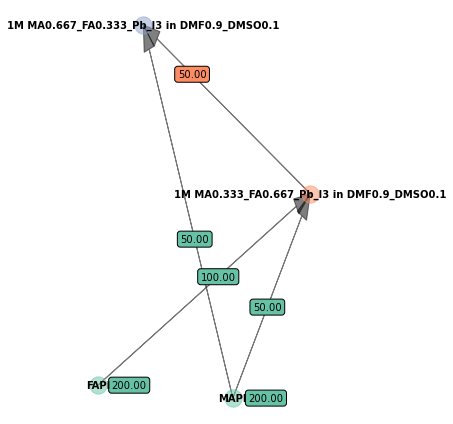

In [10]:
fig, ax = plt.subplots(figsize=(6,6))
sm.plot(ax=ax)